/Users/maduriadithyavardhanreddy/Desktop/ddfa/env/lib/python3.8/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


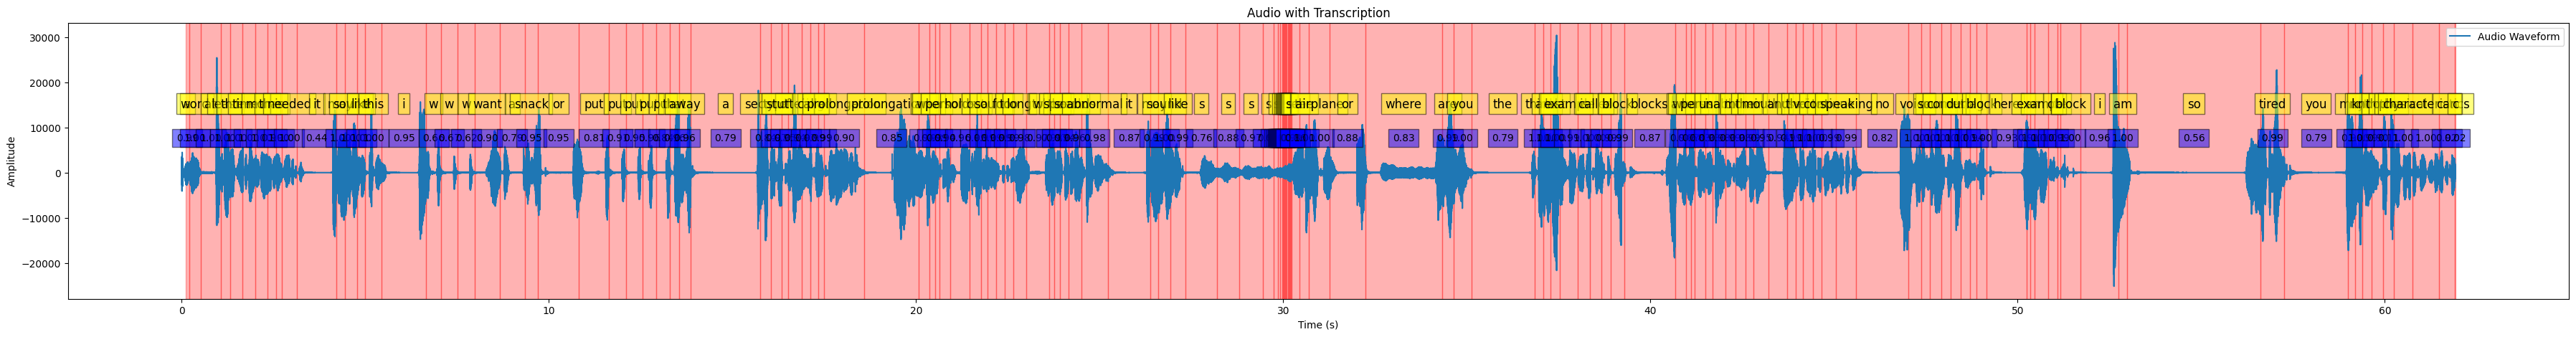

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pydub import AudioSegment
import numpy as np

# Function to load audio and plot waveform
def plot_audio_with_transcription(audio_file, transcriptions):
    # Load audio
    audio = AudioSegment.from_file(audio_file)
    samples = np.array(audio.get_array_of_samples())
    sample_rate = audio.frame_rate
    duration = len(audio) / 1000.0  # in seconds

    # Create time axis
    time_axis = np.linspace(0, duration, num=len(samples))

    # Plot waveform
    plt.figure(figsize=(45, 5))
    plt.plot(time_axis, samples, label='Audio Waveform')
    
    # Add transcriptions
    for _, transcription in transcriptions.iterrows():
        id_, text, start, end, confidence = transcription
        plt.axvspan(start, end, color='red', alpha=0.3)
        plt.text((start + end) / 2, max(samples) / 2, text, fontsize=12, ha='center', va='center', 
                 bbox=dict(facecolor='yellow', alpha=0.5))
        plt.text((start + end) / 2, max(samples) / 4, f'{confidence:.2f}', fontsize=10, ha='center', va='center', 
                 bbox=dict(facecolor='blue', alpha=0.5))

    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.title('Audio with Transcription')
    plt.legend()
    plt.show()

# Read transcriptions from CSV
transcriptions = pd.read_csv('trans.csv')

# Plot audio with transcription
plot_audio_with_transcription('input.wav', transcriptions)
